<a href="https://colab.research.google.com/github/CptK1ng/dmc2019/blob/master/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

To edit in colab click button above ([or here](https://colab.research.google.com/github/CptK1ng/dmc2019/blob/master/notebooks/EDA.ipynb)) or import from github via the colab menu and connect github to google account.

To save, connect github to google account and select File → Save a copy in GitHub, select right repo and set filename to _notebooks/EDA.ipynb_ . 

## Import

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model, metrics
%matplotlib inline

Download Dataset:

In [0]:
!wget -nc https://www.data-mining-cup.com/download/dmc-2019-task/?wpdmdl=1936 -O DMC_2019_task.zip && unzip -o DMC_2019_task.zip #; rm DMC_2019_task.zip #; ls DMC_2019_task

File ‘DMC_2019_task.zip’ already there; not retrieving.


Import Data:

In [0]:
df_train_original = pd.read_csv("DMC_2019_task/train.csv", sep="|")
df_test_original = pd.read_csv("DMC_2019_task/test.csv", sep="|")
df_train_original.head(2)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0


## Analysis

### Fraud Distribution

In [0]:
df_train_original[['fraud']].describe().T

,count,mean,std,min,25%,50%,75%,max
fraud,1879.0,0.055349,0.22872,0.0,0.0,0.0,0.0,1.0


### Correlations between features:

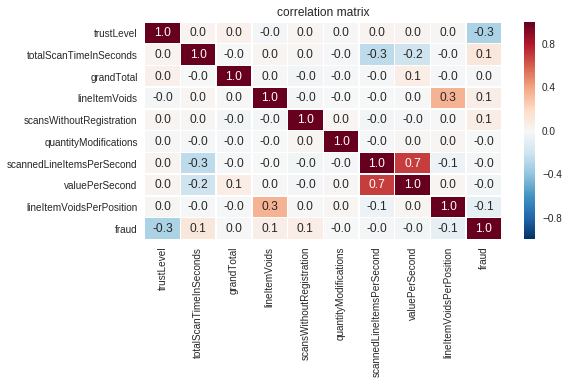

In [0]:
#correlation map
f,ax = plt.subplots(figsize=(8, 4))
sns.heatmap(df_train_original.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title("correlation matrix")
plt.show()

As we can see, no much correlation, only a little betweeen _scannedLineItemsPerSecond_ and _valuePerSecond_

### Scatter Plots

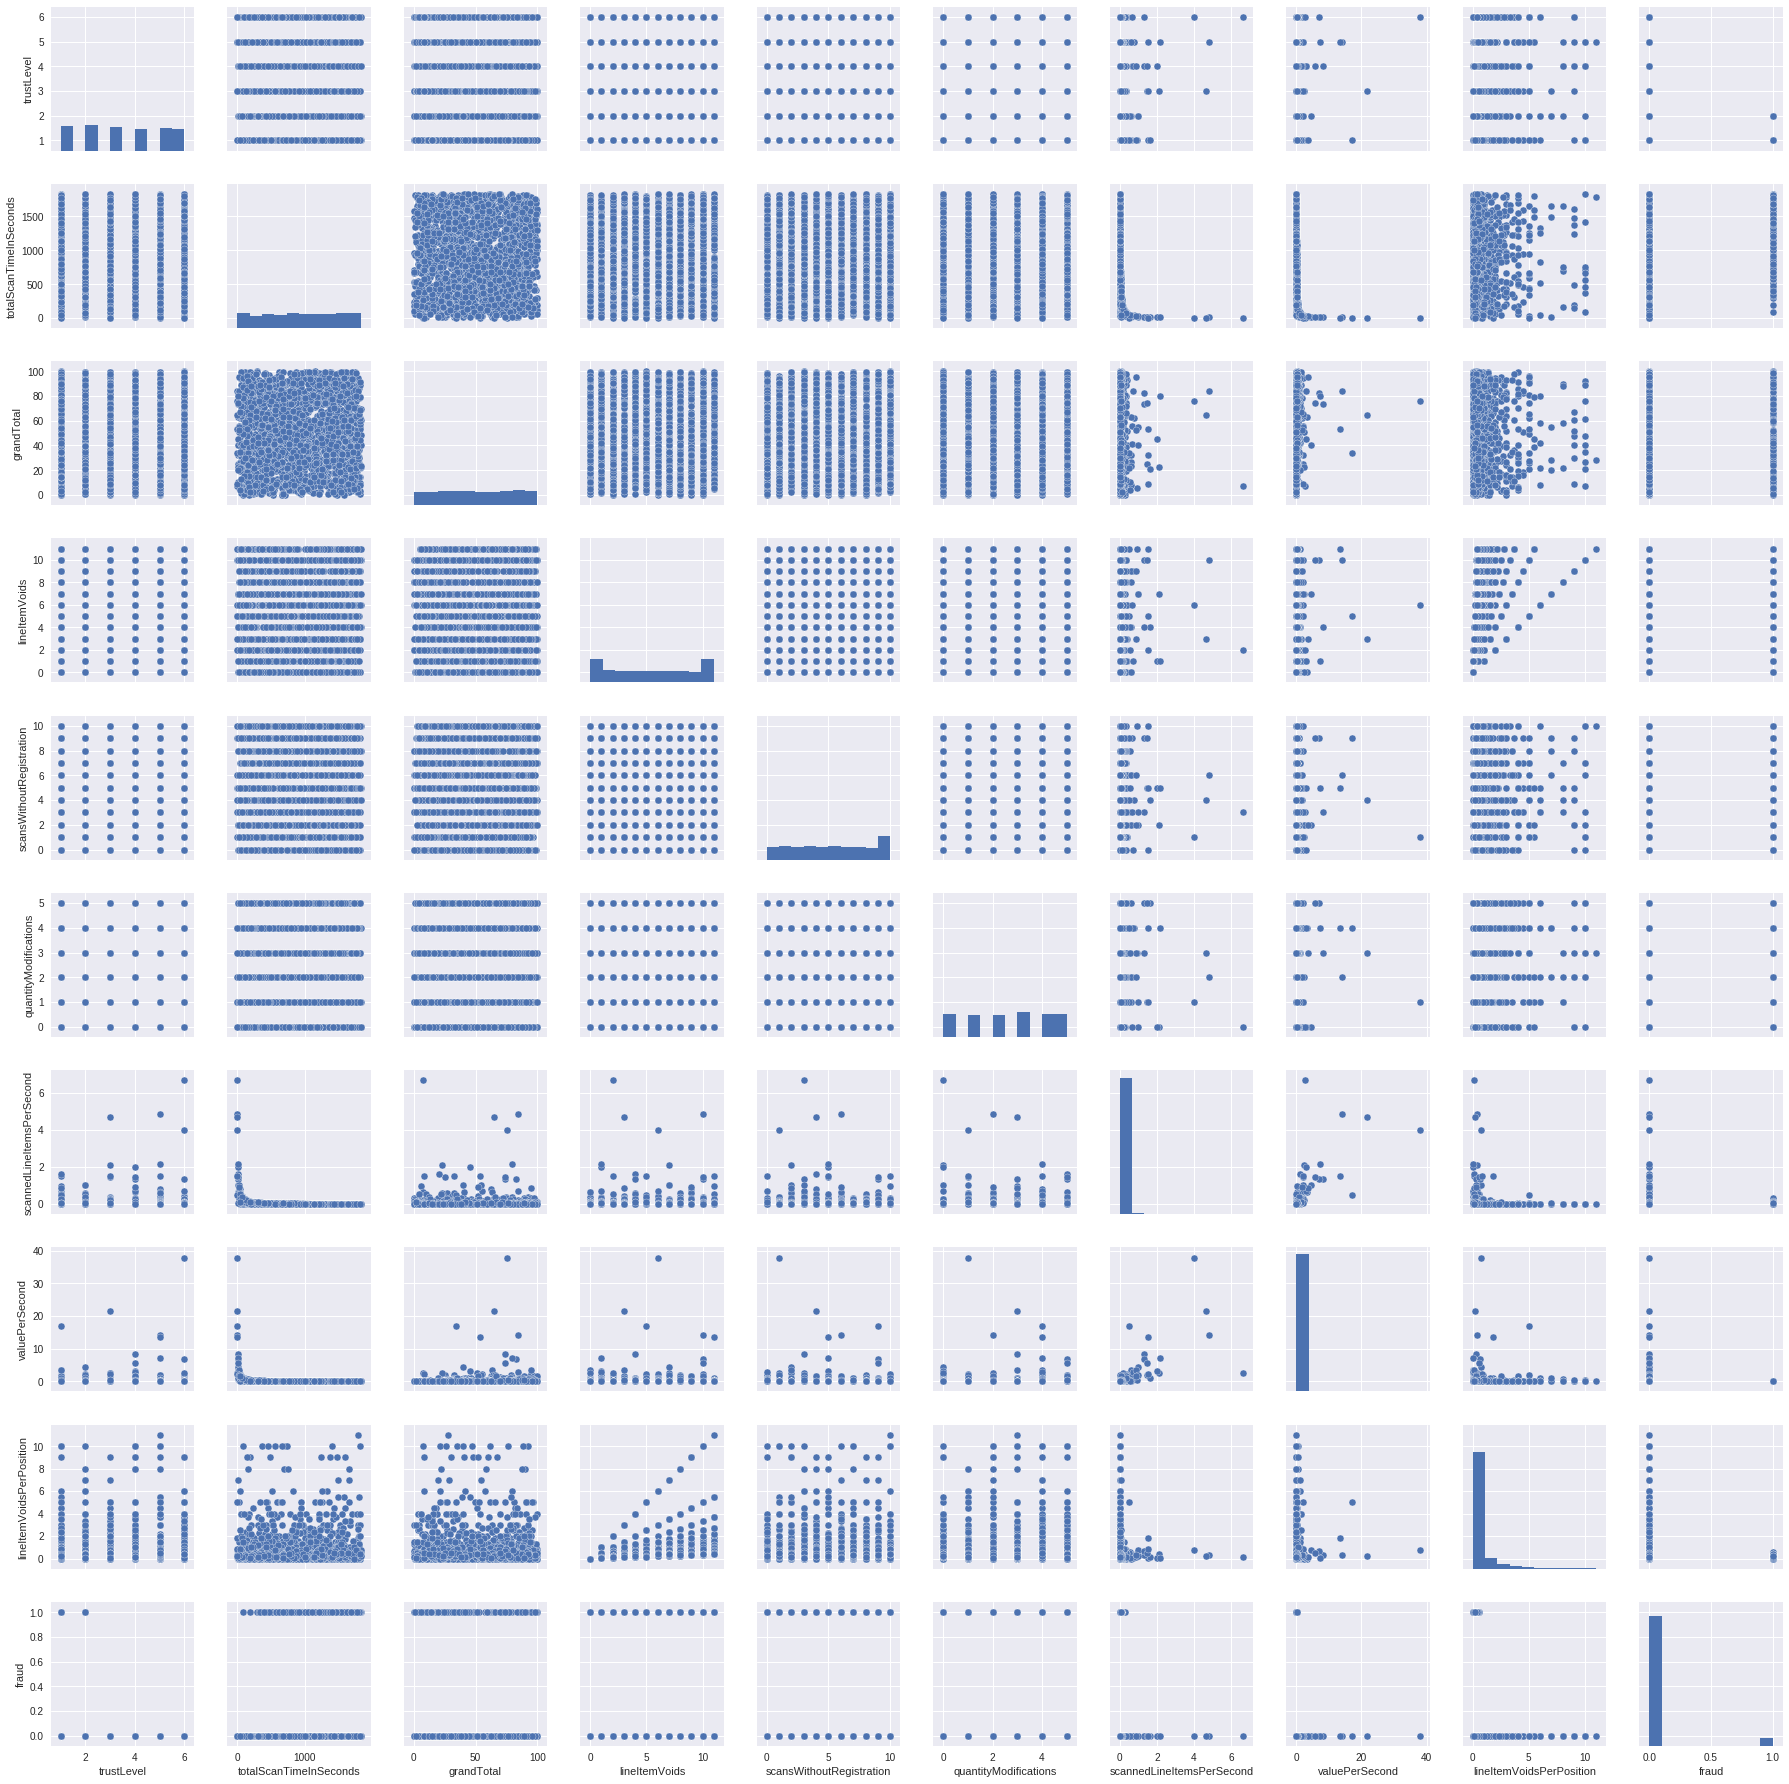

In [0]:
sns.set()
sns.pairplot(df_train_original)
plt.show();

**TODO**: What can we see here?

### 

## Simple Classificator


In [0]:
# Splitting the final dataset into internal training and testing datasets
df_train_X = df_train_original.drop('fraud', axis=1)
df_train_y = df_train_original['fraud']
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_train_X, df_train_y, random_state=0)

In [0]:
# Fitting the model and printing the accuracy score
model = linear_model.SGDClassifier(loss='log', max_iter=4000, tol=1e-3, random_state=0) # Random state is fixed for reproducibility
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9404255319148936

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


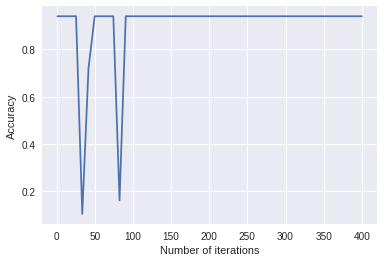

In [0]:
# Checking the convergence of the model
n_iter = np.linspace(1, 400)
scores = np.array([])
for n in n_iter:
    model = linear_model.SGDClassifier(loss='log', max_iter=n, tol=1e-3, random_state=0)
    model.fit(X_train, y_train)
    scores = np.append(scores, model.score(X_test, y_test))
    
plt.plot(n_iter, scores)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.show()

In [0]:
# Printing the confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[442,   0],
       [ 28,   0]])